
# Detect Outliers

```bash
  by Jeffrey Chijioke-Uche, MSIS, MSIT, CPDS (IBM Sr. Solution Architect, Hybrid Cloud & Multicloud)
  IBM Information Technology PhD Scholar at Harvard University & Walden University 
```

### Reference
http://scikit-learn.org/stable/modules/outlier_detection.html 

In [1]:
# This is to print in markdown style
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

import pandas as pd

# Read dataset:
df = pd.read_csv('./data/db-readability-length.csv', index_col=0)
del df['Length']
X = df['Readability'].values
X = X.reshape(len(X))
df.head()

,Readability
post id,
0,11.6
1,6.9
2,6.3
3,4.0
4,9.2


In [3]:
import numpy as np
# Calculate the statistics
print("Mean= ", np.mean(X))
print("Median= ", np.median(X))
print("Max/Min=", X.max(), " ", X.min())
print("StdDev=", np.std(X))
print("95th Percentile", np.percentile(X, 95))
print("5th Percentile",np.percentile(X,5))

Mean=  7.85529661017
Median=  7.2
Max/Min= 106.2   -8.1
StdDev= 5.50524773886
95th Percentile 14.3
5th Percentile 2.6


In [8]:
# Only keep data in range 5 to 95th percentile:
X = df[df['Readability'].between(np.percentile(X,5), np.percentile(X,95), inclusive=True )].values

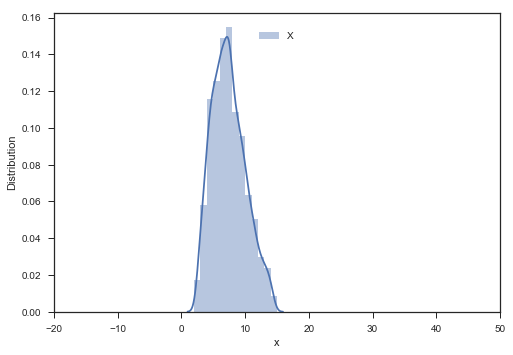

In [7]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
#df = sns.load_dataset("anscombe")

bins = np.arange(-20,50,1)

# Show the results of a linear regression within each dataset
ax = sns.distplot(X,bins=bins,label='X')

plt.pyplot.xlabel('x')
plt.pyplot.ylabel('Distribution')
plt.pyplot.legend(bbox_to_anchor=(0.45, 0.95), loc=2, borderaxespad=0.)

plt.pyplot.xlim((-20,50))
plt.pyplot.show()